**Dataset**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=3000, noise=0.3)

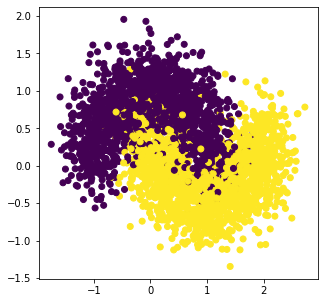

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [3]:
idx = []
for idx_yi, yi in enumerate(y):
  if (yi == 1) and (idx_yi % 22 == 0):
    idx.append(idx_yi)
  elif yi == 0:
    idx.append(idx_yi)

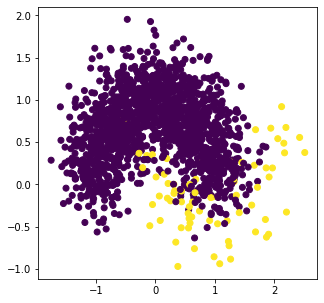

In [4]:
X = X[idx, ]
y = y[idx]

plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

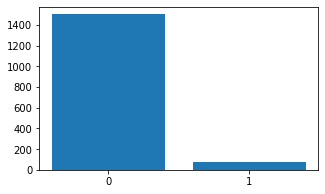

In [5]:
y_labels, y_counts = np.unique(y, return_counts=True)

plt.figure(figsize=(5, 3))
plt.bar(y_labels, y_counts)

plt.xticks(y_labels)
plt.show()

In [6]:
rate = y_counts[1] / y_counts.sum()
print('label 1의 비율 = {}%'.format(round(rate*100, 2)))

label 1의 비율 = 4.64%


In [7]:
from sklearn.model_selection import train_test_split
trn_X, tst_X, trn_y, tst_y = train_test_split(X, y,
                                              test_size=0.3,
                                              stratify=y,
                                              random_state=1234)
print(trn_X.shape, tst_X.shape)

(1101, 2) (472, 2)


**Baseline**

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

N_Estimators = [5, 10, 15, 20, 25, 30]
Max_Depth = [2, 4, 6]

clf_dt = DecisionTreeClassifier()
clf_rf = RandomForestClassifier()
clf_ab = AdaBoostClassifier()

num_cv = 5
score = 'f1_macro'

grid_dt = GridSearchCV(clf_dt,
                       param_grid={'max_depth': Max_Depth},
                       scoring=score,
                       cv=num_cv, n_jobs=-1)

grid_rf = GridSearchCV(clf_rf,
                       param_grid={'max_depth': Max_Depth,
                                   'n_estimators': N_Estimators},
                       scoring=score,
                       cv=num_cv, n_jobs=-1)

grid_ab = GridSearchCV(clf_ab,
                       param_grid={'n_estimators': N_Estimators},
                       scoring=score,
                       cv=num_cv, n_jobs=-1)

In [9]:
grid_dt.fit(trn_X, trn_y)
grid_rf.fit(trn_X, trn_y)
grid_ab.fit(trn_X, trn_y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30]},
             scoring='f1_macro')

In [10]:
best_dt = grid_dt.best_estimator_
best_rf = grid_rf.best_estimator_
best_ab = grid_ab.best_estimator_

prd_dt_base = best_dt.predict(tst_X)
prd_rf_base = best_rf.predict(tst_X)
prd_ab_base = best_ab.predict(tst_X)

In [11]:
from sklearn.metrics import f1_score
f1_dt_base = f1_score(tst_y, prd_dt_base, pos_label=1)
f1_rf_base = f1_score(tst_y, prd_rf_base, pos_label=1)
f1_ab_base = f1_score(tst_y, prd_ab_base, pos_label=1)

print(f1_dt_base)
print(f1_rf_base)
print(f1_ab_base)

0.5945945945945945
0.6666666666666665
0.6486486486486486


**Under Sampling**

In [12]:
# Tomek Links
from imblearn.under_sampling import TomekLinks

trn_X_tomek, trn_y_tomek = TomekLinks().fit_resample(trn_X, trn_y)
print('원래 데이터:', trn_X.shape)
print('Under Sampling 결과: ', trn_X_tomek.shape)

원래 데이터: (1101, 2)
Under Sampling 결과:  (1081, 2)


In [13]:
grid_dt.fit(trn_X_tomek, trn_y_tomek)
grid_rf.fit(trn_X_tomek, trn_y_tomek)
grid_ab.fit(trn_X_tomek, trn_y_tomek)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30]},
             scoring='f1_macro')

In [14]:
best_dt_tomek = grid_dt.best_estimator_
best_rf_tomek = grid_rf.best_estimator_
best_ab_tomek = grid_ab.best_estimator_

prd_dt_tomek = best_dt_tomek.predict(tst_X)
prd_rf_tomek = best_rf_tomek.predict(tst_X)
prd_ab_tomek = best_ab_tomek.predict(tst_X)

In [15]:
f1_dt_tomek = f1_score(tst_y, prd_dt_tomek, pos_label=1)
f1_rf_tomek = f1_score(tst_y, prd_rf_tomek, pos_label=1)
f1_ab_tomek = f1_score(tst_y, prd_ab_tomek, pos_label=1)

print(f1_dt_tomek)
print(f1_rf_tomek)
print(f1_ab_tomek)

0.6666666666666666
0.7027027027027029
0.7000000000000001


In [16]:
# CNN Rules
from imblearn.under_sampling import CondensedNearestNeighbour

trn_X_cnn, trn_y_cnn = CondensedNearestNeighbour().fit_resample(trn_X, trn_y)
print('원래 데이터:', trn_X.shape)
print('Under Sampling 결과: ', trn_X_cnn.shape)

grid_dt.fit(trn_X_cnn, trn_y_cnn)
grid_rf.fit(trn_X_cnn, trn_y_cnn)
grid_ab.fit(trn_X_cnn, trn_y_cnn)

best_dt_cnn = grid_dt.best_estimator_
best_rf_cnn = grid_rf.best_estimator_
best_ab_cnn = grid_ab.best_estimator_

prd_dt_cnn = best_dt_cnn.predict(tst_X)
prd_rf_cnn = best_rf_cnn.predict(tst_X)
prd_ab_cnn = best_ab_cnn.predict(tst_X)

f1_dt_cnn = f1_score(tst_y, prd_dt_cnn, pos_label=1)
f1_rf_cnn = f1_score(tst_y, prd_rf_cnn, pos_label=1)
f1_ab_cnn = f1_score(tst_y, prd_ab_cnn, pos_label=1)

print(f1_dt_cnn)
print(f1_rf_cnn)
print(f1_ab_cnn)

원래 데이터: (1101, 2)
Under Sampling 결과:  (123, 2)
0.39999999999999997
0.6842105263157896
0.5818181818181818


In [17]:
# OSS
from imblearn.under_sampling import OneSidedSelection

trn_X_oss, trn_y_oss = OneSidedSelection().fit_resample(trn_X, trn_y)
print('원래 데이터:', trn_X.shape)
print('Under Sampling 결과: ', trn_X_oss.shape)

grid_dt.fit(trn_X_oss, trn_y_oss)
grid_rf.fit(trn_X_oss, trn_y_oss)
grid_ab.fit(trn_X_oss, trn_y_oss)

best_dt_oss = grid_dt.best_estimator_
best_rf_oss = grid_rf.best_estimator_
best_ab_oss = grid_ab.best_estimator_

prd_dt_oss = best_dt_oss.predict(tst_X)
prd_rf_oss = best_rf_oss.predict(tst_X)
prd_ab_oss = best_ab_oss.predict(tst_X)

f1_dt_oss = f1_score(tst_y, prd_dt_oss, pos_label=1)
f1_rf_oss = f1_score(tst_y, prd_rf_oss, pos_label=1)
f1_ab_oss = f1_score(tst_y, prd_ab_oss, pos_label=1)

print(f1_dt_oss)
print(f1_rf_oss)
print(f1_ab_oss)

원래 데이터: (1101, 2)
Under Sampling 결과:  (794, 2)
0.6521739130434783
0.6842105263157896
0.6666666666666667


**Over Sampling**

In [18]:
# SMOTE
from imblearn.over_sampling import SMOTE

trn_X_smote, trn_y_smote = SMOTE().fit_resample(trn_X, trn_y)
print('원래 데이터:', trn_X.shape)
print('Over Sampling 결과: ', trn_X_smote.shape)

grid_dt.fit(trn_X_smote, trn_y_smote)
grid_rf.fit(trn_X_smote, trn_y_smote)
grid_ab.fit(trn_X_smote, trn_y_smote)

best_dt_smote = grid_dt.best_estimator_
best_rf_smote = grid_rf.best_estimator_
best_ab_smote = grid_ab.best_estimator_

prd_dt_smote = best_dt_smote.predict(tst_X)
prd_rf_smote = best_rf_smote.predict(tst_X)
prd_ab_smote = best_ab_smote.predict(tst_X)

f1_dt_smote = f1_score(tst_y, prd_dt_smote, pos_label=1)
f1_rf_smote = f1_score(tst_y, prd_rf_smote, pos_label=1)
f1_ab_smote = f1_score(tst_y, prd_ab_smote, pos_label=1)

print(f1_dt_smote)
print(f1_rf_smote)
print(f1_ab_smote)

원래 데이터: (1101, 2)
Over Sampling 결과:  (2100, 2)
0.3571428571428571
0.48717948717948717
0.5753424657534247


In [19]:
# Borderline-SMOTE
from imblearn.over_sampling import BorderlineSMOTE

trn_X_b_smote, trn_y_b_smote = BorderlineSMOTE().fit_resample(trn_X, trn_y)
print('원래 데이터:', trn_X.shape)
print('Over Sampling 결과: ', trn_X_b_smote.shape)

grid_dt.fit(trn_X_b_smote, trn_y_b_smote)
grid_rf.fit(trn_X_b_smote, trn_y_b_smote)
grid_ab.fit(trn_X_b_smote, trn_y_b_smote)

best_dt_b_smote = grid_dt.best_estimator_
best_rf_b_smote = grid_rf.best_estimator_
best_ab_b_smote = grid_ab.best_estimator_

prd_dt_b_smote = best_dt_b_smote.predict(tst_X)
prd_rf_b_smote = best_rf_b_smote.predict(tst_X)
prd_ab_b_smote = best_ab_b_smote.predict(tst_X)

f1_dt_b_smote = f1_score(tst_y, prd_dt_b_smote, pos_label=1)
f1_rf_b_smote = f1_score(tst_y, prd_rf_b_smote, pos_label=1)
f1_ab_b_smote = f1_score(tst_y, prd_ab_b_smote, pos_label=1)

print(f1_dt_b_smote)
print(f1_rf_b_smote)
print(f1_ab_b_smote)

원래 데이터: (1101, 2)
Over Sampling 결과:  (2100, 2)
0.5205479452054794
0.5555555555555556
0.5384615384615384


In [20]:
f1_dt = [f1_dt_base, f1_dt_tomek, f1_dt_cnn, f1_dt_oss, f1_dt_smote, f1_dt_b_smote]
f1_rf = [f1_rf_base, f1_rf_tomek, f1_rf_cnn, f1_rf_oss, f1_rf_smote, f1_rf_b_smote]
f1_ab = [f1_ab_base, f1_ab_tomek, f1_ab_cnn, f1_ab_oss, f1_ab_smote, f1_ab_b_smote]

sample_type = ['Baseline', 'Tomek', 'CNN', 'OSS', 'SMOTE', 'B-SMOTE']
results = pd.DataFrame({'DT': f1_dt,
                        'RF': f1_rf,
                        'AB': f1_ab},
                       index=sample_type)
print(round(results, 2))

            DT    RF    AB
Baseline  0.59  0.67  0.65
Tomek     0.67  0.70  0.70
CNN       0.40  0.68  0.58
OSS       0.65  0.68  0.67
SMOTE     0.36  0.49  0.58
B-SMOTE   0.52  0.56  0.54


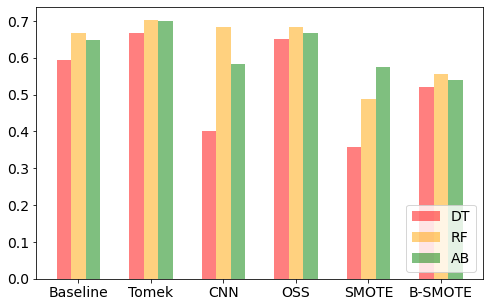

In [23]:
w = 0.2
n = results.shape[0]
idx = np.arange(n)

plt.figure(figsize=(8, 5))
plt.bar(idx-w, results['DT'], width=w,
        color='red', alpha=0.5,
        label='DT')

plt.bar(idx, results['RF'], width=w,
        color='orange', alpha=0.5,
        label='RF')

plt.bar(idx+w, results['AB'], width=w,
        color='green', alpha=0.5,
        label='AB')

plt.xticks(idx, labels=sample_type, fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc='lower right')
plt.show()